m2dsupsdlclass/lectures-labs  
https://github.com/m2dsupsdlclass/lectures-labs/blob/master/labs/02_backprop/Backpropagation_numpy.ipynb  
implementING a real gradient descent in Numpy

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

------------------------------


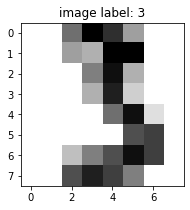

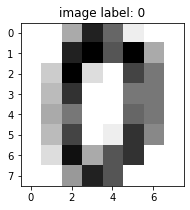

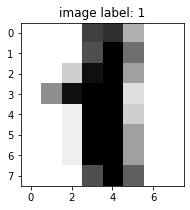

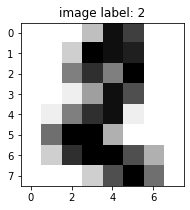

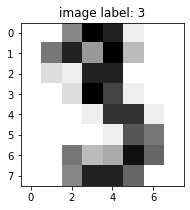

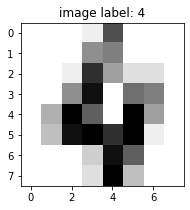

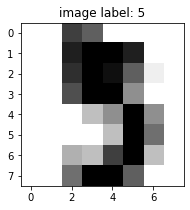

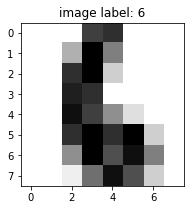

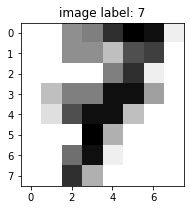

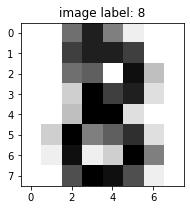

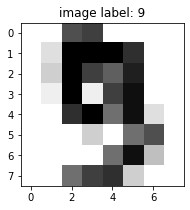

In [32]:
sample_index = 45

plt.figure(figsize=(3, 3))

plt.imshow(digits.images[sample_index],
    cmap=plt.cm.gray_r,
    interpolation='nearest')





# digits.target - labels for each of the examples in the dataset
plt.title("image label: %d" % digits.target[sample_index]);

print("------------------------------")
for i in range(0,10):
    plt.figure(figsize=(3, 3))
    plt.title("image label: %d" % digits.target[i]);
    plt.imshow(digits.images[i],
        cmap          = plt.cm.gray_r,
        interpolation = 'nearest')

In [51]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# cast digits.data/digits.target ndarray from float64/int64 to float32/int32
data   = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

print(digits.data)
print(digits.data.dtype)
print(digits.target.dtype)
print("-----------------------------------------------------")
print(data)
print(data.dtype)
print(target.dtype)


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

# IMAGE_PREPROCESSING
# mean = 0 ; standard deviation = 1.0
scaler  = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

print("--------------------------------------")
print(X_train.shape)
print(X_train.dtype)

print(X_test.shape)

print(y_train.shape)
print(y_train.dtype)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
float64
int64
-----------------------------------------------------
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
float32
int32
--------------------------------------
(1527, 64)
float32
(270, 64)
(1527,)
int32


In [8]:

# np.eye() - https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html
#            Return a 2-D array with ones on the diagonal and zeros elsewhere.
#            numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')
#            N - Number of rows in the output.
#            k - Index of the diagonal: 0 (the default) refers to the main diagonal
print(np.eye(10, k=0))
print("=============")

def one_hot(n_classes, y):
    
    # [y] - picks the row of the identity matrix, since thats
    #       the row that contains the diagonal value (one-hot-encoding)
    #       that we want.
    return np.eye(n_classes)[y]

print("ONE_HOT_ENCODING")
for i in digits.target[0:20]:
    print(one_hot(n_classes=10, y=i))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
ONE_HOT_ENCODING
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


- Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.   
- takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers.  
- after applying softmax, each component will be in the interval ( 0 , 1 ) {\displaystyle (0,1)} (0,1), and the components will add up to 1, so that they can be interpreted as probabilities
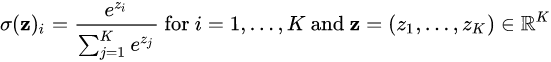


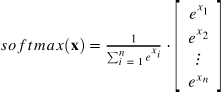

In [ ]:

import tensorflow as tf
tf.executing_eagerly()

logits = [0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]
t = tf.nn.softmax(logits, axis=None, name=None)
print(t)

[0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]
[0.02134556 0.1427142  0.02607153 0.0235905  0.05250162 0.17431152
 0.3879374  0.0288135  0.1427142 ]
sum of softmax components - 1.0


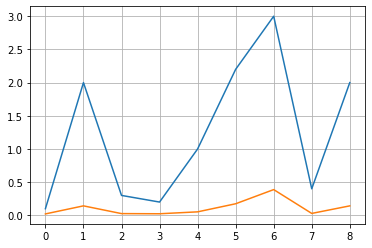

In [37]:
# TENSORFLOW_SOFTMAX

import tensorflow as tf

sess = tf.compat.v1.Session()

logits = [0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]
t = tf.nn.softmax(logits, axis=None, name=None)
print(logits)
print(sess.run(t))
print("sum of softmax components - %s"%(np.sum(sess.run(t))))

import matplotlib.pyplot as plt

plt.grid(True)
plt.plot(range(0, len(logits)),
    logits)

plt.plot(range(0, len(logits)),
    sess.run(t))

[0.02134556 0.14271419 0.02607153 0.0235905  0.05250162 0.17431151
 0.3879374  0.0288135  0.14271419]


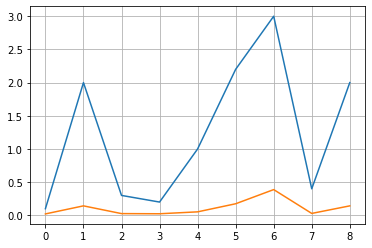

In [38]:
# MANUAL_SOFTMAX
def softmax(X):
    exp = np.exp(X)
    # print(np.sum(exp, axis=-1, keepdims=True))
    return exp / np.sum(exp, axis=-1, keepdims=True)

logits = [0.1, 2, 0.3, 0.2, 1.0, 2.2, 3, 0.4, 2]
print(softmax(logits))

plt.grid(True)
plt.plot(range(0, len(logits)),
    logits)

plt.plot(range(0, len(logits)),
    sess.run(t))

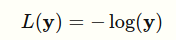    
Negative Log-Likelihood (NLL)    
Loss Function   
log-likelyhood is usually used for a set of values (for continuous median square error is preffered)   
http://wiki.fast.ai/index.php/Log_Loss

$$L(y) = - \log(y)$$

Logarithmic loss (related to cross-entropy) measures the performance of a classification model where the prediction input is a probability value between 0 and 1   
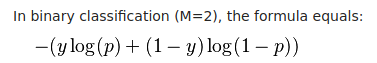

$$-(y \log p + (1 - y)\log(1 - p))$$

In [ ]:
# https://stats.stackexchange.com/questions/113301/multi-class-logarithmic-loss-function-per-class
    

    
def nll_multi_class(set_true, set_pred, prob):
    
    """
    in our case both set_true, 
    set_pred are {0, 1, 2, \dots, 9}
    
    neg. log. likelihood 
    prob: matrix over (t, p) 
    prob(t, p) is probability 
    that output = p given that input = t
    prob(output=p | input=t) 
    
    # prob(x, y) = 1/100 b/c we do not know so we take unif. 
    # 10 * 10 possibilities
    
    # only the one-hot encoding member that is set (to 1) is actually influencing\n",
    # the outputed loss value because all other members are 0 and Y_true * np.log would\n",
    # be 0 as well and wouildnt contribute to the result.\n",

    
    """
    
    
    loss = 0.0
    for t in set_t: 
        for p in set_p: 
#             expected_loss += prob(x, y) * loss(x, y) # for x == y loss(x, x) = 0
            loss += t * log(prob(t, p))
    
    return -loss
        
    
    

(array([ 4.,  5.,  8.,  8., 12., 25., 18., 26., 20., 20., 16., 14., 34.,
        30., 26., 18., 21., 29., 24., 19., 22., 20., 19., 22., 16.,  7.,
         7.,  5.,  4.,  1.]),
 array([1.76423407, 1.80498392, 1.84573377, 1.88648361, 1.92723346,
        1.96798331, 2.00873316, 2.04948301, 2.09023285, 2.1309827 ,
        2.17173255, 2.2124824 , 2.25323225, 2.2939821 , 2.33473194,
        2.37548179, 2.41623164, 2.45698149, 2.49773134, 2.53848119,
        2.57923103, 2.61998088, 2.66073073, 2.70148058, 2.74223043,
        2.78298027, 2.82373012, 2.86447997, 2.90522982, 2.94597967,
        2.98672952]),
 <a list of 30 Patch objects>)

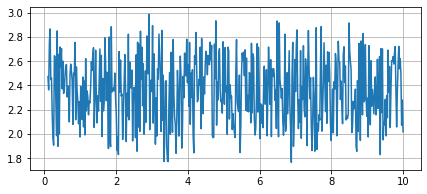

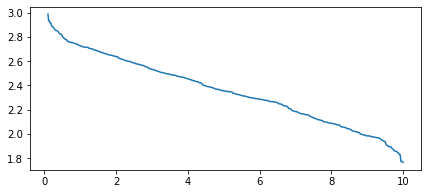

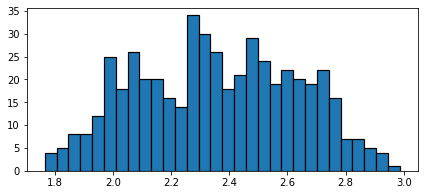

In [43]:
# def negative_log_likelihood(p_true_val, p_predict_val):
#     # tf.log() - log with base "e"
#     return -(p_true_val * np.log(p_predict_val) + (1.0 - p_true_val) * np.log(1 - p_predict_val))

# p_true_prob - probability distribution vector where only a sincle element is 1, rest are 0.
#               this is the true value, a one-hot encoding of the true class/label.
# p_predicted_prob - prob. dist. vector where most elements are non-0, and one element (predicted class)
#                    is of higher value (prob) then all other elements (its the predicted class/label)
def loss(p_true_prob, p_predicted_prob):
    return negative_log_likelihood(p_true_prob, p_predicted_prob)

classes_num_int = 10
samples_num_int = 500
x_lst = np.linspace(0.1, 10, samples_num_int)
    

random_classes_lst = np.floor(np.random.random(samples_num_int)*10)
loss_lst           = []

for c in random_classes_lst:
    true_prob = one_hot(n_classes=classes_num_int, y=int(c))
    pred_prob = softmax(np.random.random(classes_num_int)) # randomized 
    
    loss_int  = loss(true_prob, pred_prob)
    loss_lst.append(loss_int)

plt.figure(figsize=(7, 3))
plt.grid(True)
plt.plot(x_lst, loss_lst)

plt.figure(figsize=(7, 3))
plt.plot(x_lst, np.flip(np.sort(loss_lst)))

plt.figure(figsize=(7, 3))
plt.hist(loss_lst, edgecolor='black', linewidth=1.2, bins=30)

In [47]:
class Model():
    def __init__(self,
        p_input_size,
        p_output_size,
        p_W,
        p_b):
        self.input_size = p_input_size
        self.output_size = p_output_size
        self.W           = p_W
        self.b           = p_b
        
#-------------------------------------------------------------
# INIT
def mod__init(p_input_size, p_output_size):
    W = np.random.uniform(size = (p_input_size, p_output_size),
       high = 0.1,
       low  = -0.1)
    
    b = np.random.uniform(size = p_output_size,
        high = 0.1,
        low  = -0.1)

    model = Model(p_input_size,
        p_output_size,
        W,
        b)
    return model
        
#-------------------------------------------------------------
# FORWARD_PASS
def mod__forward_pass(X, p_model):
    Z = np.dot(X, p_model.W) + p_model.b
    return softmax(Z)

#-------------------------------------------------------------
# PREDICT
def mod__predict(X, p_model):
    if len(X.shape) == 1:
        return np.argmax(mod__forward_pass(X, p_model))
    else:
        return np.argmax(mod__forward_pass(X, p_model), axis=1)

#-------------------------------------------------------------
def mod__grad_loss(x, y_true, p_model):
    y_pred        = mod__forward_pass(x, p_model)
    y_true_onehot = one_hot(p_model.output_size, y_true)
    
    dnll_output = y_pred - y_true_onehot
    grad_W      = np.outer(x, dnll_output)
    grad_b      = dnll_output
    grads       = {"W": grad_W, "b": grad_b}
    return grads

#-------------------------------------------------------------
# TRAIN
def mod__train(x, y, p_learning_rate, p_model):
    # Traditional SGD update without momentum
    grads     = mod__grad_loss(x, y, p_model)
    p_model.W = p_model.W - p_learning_rate * grads["W"]
    p_model.b = p_model.b - p_learning_rate * grads["b"]      

#-------------------------------------------------------------
# LOSS
def mod__loss(X, y, p_model):
    true_val      = one_hot(p_model.output_size, y)
    predicted_val = mod__forward_pass(X, p_model)
    return loss(true_val, predicted_val)

#-------------------------------------------------------------
# ACCURACY
def mod__accuracy(X, y, p_model):
    y_preds = np.argmax(mod__forward_pass(X, p_model), axis=1)
    return np.mean(y_preds == y)


In [48]:
# number of features per example
n_features = X_train.shape[1]
n_classes  = len(np.unique(y_train))

print("n_features - %s"%(n_features))
print("n_classes  - %s"%(n_classes))

model = mod__init(n_features, n_classes)

print("Evaluation of the untrained model:")
train_loss = mod__loss(X_train, y_train, model)
train_acc  = mod__accuracy(X_train, y_train, model)
test_acc   = mod__accuracy(X_test, y_test, model)

# print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
#       % (train_loss, train_acc, test_acc))

n_features - 64
n_classes  - 10
Evaluation of the untrained model:


In [ ]:
# TODO - convert the training algorithm from single-example training, to batch-example training.
#        train function is to take as input vector of examples and labels, of lenght BATCH (input parameter).
#        currently its taking single values.
#        modify the training loop as well, to add epoch, and per ephoch randomly suffle X/Y input datasets,
#        so that batches (per training loop) are randomized each time.

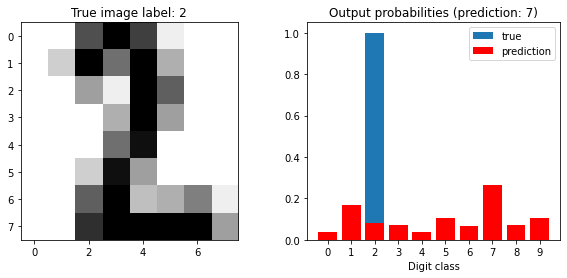

In [54]:



def plot_prediction(p_model, p_sample_idx=0, p_classes=range(10)):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0.imshow(scaler.inverse_transform(X_test[p_sample_idx]).reshape(8, 8),
        cmap          = plt.cm.gray_r,
        interpolation = 'nearest')
    ax0.set_title("True image label: %d" % y_test[p_sample_idx]);


    ax1.bar(p_classes, one_hot(len(p_classes), y_test[p_sample_idx]), label='true')
    
    ax1.bar(p_classes, mod__forward_pass(X_test[p_sample_idx], p_model), label='prediction', color="red")
    
    ax1.set_xticks(p_classes)
    
    # PREDICT
    prediction = mod__predict(X_test[p_sample_idx], p_model)
    
    ax1.set_title('Output probabilities (prediction: %d)' % prediction)
    
    ax1.set_xlabel('Digit class')
    ax1.legend()
    
plot_prediction(model, sample_idx=0)

Update #0, train loss: 353.5362, train acc: 0.955, test acc: 0.956
Update #100, train loss: 339.2687, train acc: 0.962, test acc: 0.963
Update #200, train loss: 327.4544, train acc: 0.959, test acc: 0.970
Update #300, train loss: 316.6234, train acc: 0.960, test acc: 0.959
Update #400, train loss: 310.9807, train acc: 0.960, test acc: 0.967
Update #500, train loss: 300.5085, train acc: 0.962, test acc: 0.967
Update #600, train loss: 292.8671, train acc: 0.963, test acc: 0.963
Update #700, train loss: 285.9418, train acc: 0.963, test acc: 0.963
Update #800, train loss: 283.8384, train acc: 0.965, test acc: 0.970
Update #900, train loss: 278.2209, train acc: 0.964, test acc: 0.970
Update #1000, train loss: 272.5686, train acc: 0.967, test acc: 0.970
Update #1100, train loss: 263.5842, train acc: 0.968, test acc: 0.974
Update #1200, train loss: 258.3345, train acc: 0.967, test acc: 0.978
Update #1300, train loss: 255.7248, train acc: 0.969, test acc: 0.970
Update #1400, train loss: 248.50

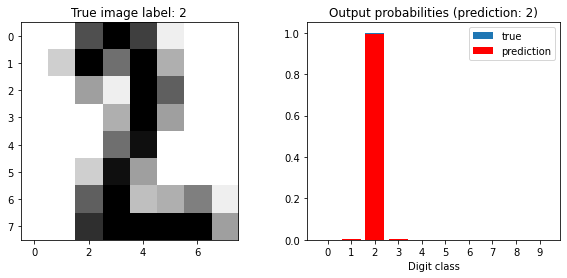

In [58]:
# Training for one epoch
learning_rate = 0.01

for i, (x, y) in enumerate(zip(X_train, y_train)):
    
    mod__train(x, y, learning_rate, model)
    
    if i % 100 == 0:
        train_loss = mod__loss(X_train, y_train, model)
        train_acc  = mod__accuracy(X_train, y_train, model)
        test_acc   = mod__accuracy(X_test, y_test, model)
        
        print("Update #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
              % (i, train_loss, train_acc, test_acc))
        
        
        

        
plot_prediction(model, sample_idx=0)